# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [3]:
df = pd.read_csv('/kaggle/input/indian-election-dataset/indian-national-level-election.csv')
df.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


# Trends

## Total Votes by Party

List of unique parties: ['IND' 'INC' 'JNP(S)' ... 'NSBP' 'IUC' 'JHAP']


Enter the party abbreviation from the above list:  INC


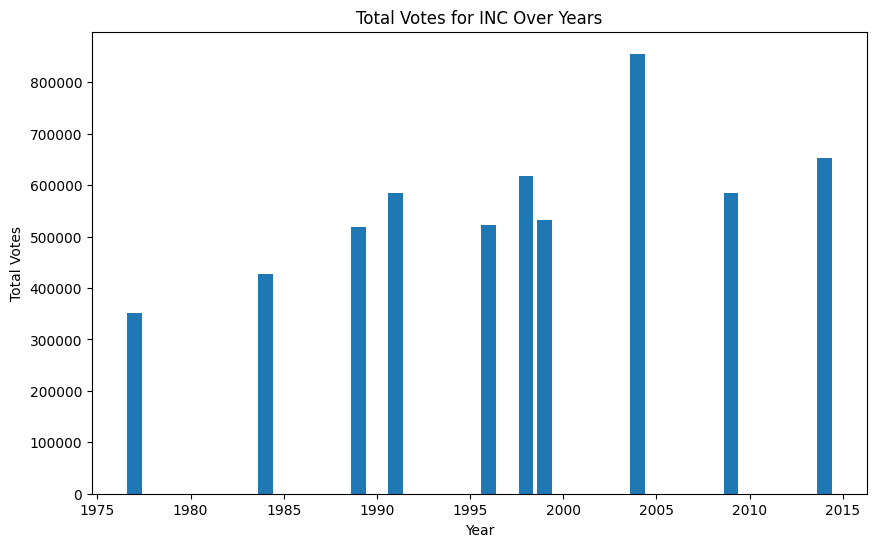

In [7]:
def get_unique_values(data):
    unique_parties = data['partyabbre'].unique()
    min_year = data['year'].min()
    max_year = data['year'].max()
    return unique_parties, (min_year, max_year)

# Function to plot Bar Chart of Total Votes by Party
def plot_total_votes_by_party(data, party):
    party_data = data[data['partyabbre'] == party]
    if len(party_data) == 0:
        print("Party not found in the dataset.")
        return
    
    plt.figure(figsize=(10, 6))
    plt.bar(party_data['year'], party_data['totvotpoll'])
    plt.xlabel('Year')
    plt.ylabel('Total Votes')
    plt.title(f'Total Votes for {party} Over Years')
    plt.show()

# Function to plot Pie Chart of Candidate Sex Distribution for a Party and Year
def plot_candidate_sex_distribution(data, party, year):
    party_year_data = data[(data['partyabbre'] == party) & (data['year'] == year)]
    if len(party_year_data) == 0:
        print("No data found for the selected party and year.")
        return
    
    sex_counts = party_year_data['cand_sex'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Candidate Sex Distribution for {party} in {year}')
    plt.show()

# Function to plot Time Series Plot of Total Votes Over Years
def plot_total_votes_over_years(data):
    total_votes_over_years = data.groupby('year')['totvotpoll'].sum()
    plt.figure(figsize=(10, 6))
    plt.plot(total_votes_over_years.index, total_votes_over_years.values, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Total Votes')
    plt.title('Total Votes Over Years')
    plt.grid(True)
    plt.show()
    
election_data = df
unique_parties, year_range = get_unique_values(election_data)

print("List of unique parties:", unique_parties)
party_choice = input("Enter the party abbreviation from the above list: ").upper()
plot_total_votes_by_party(election_data, party_choice)

## Parliamentry Constituency Type Distribution

Enter the year:  2014


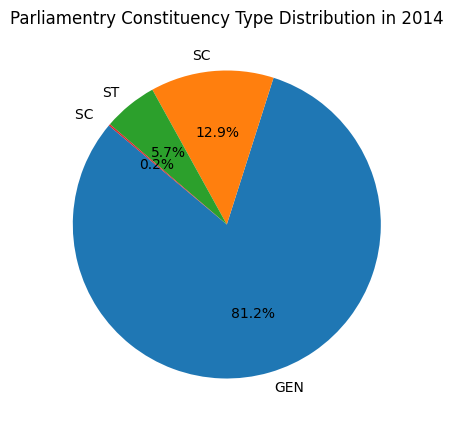

In [9]:
def plot_pie_chart_pc_type(data, year):
    year_data = data[data['year'] == year]
    pc_type_counts = year_data['pc_type'].value_counts()
    
    plt.figure(figsize=(5, 5))
    plt.pie(pc_type_counts, labels=pc_type_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Parliamentry Constituency Type Distribution in {year}')
    plt.show()

year_choice = int(input("Enter the year: "))
# Plot pie chart for PC Type Distribution
plot_pie_chart_pc_type(election_data, year_choice)

## Total Votes by Candidate in a Constituency and Year

Enter the constituency name (pc_name):  Varanasi
Enter the year:  2014


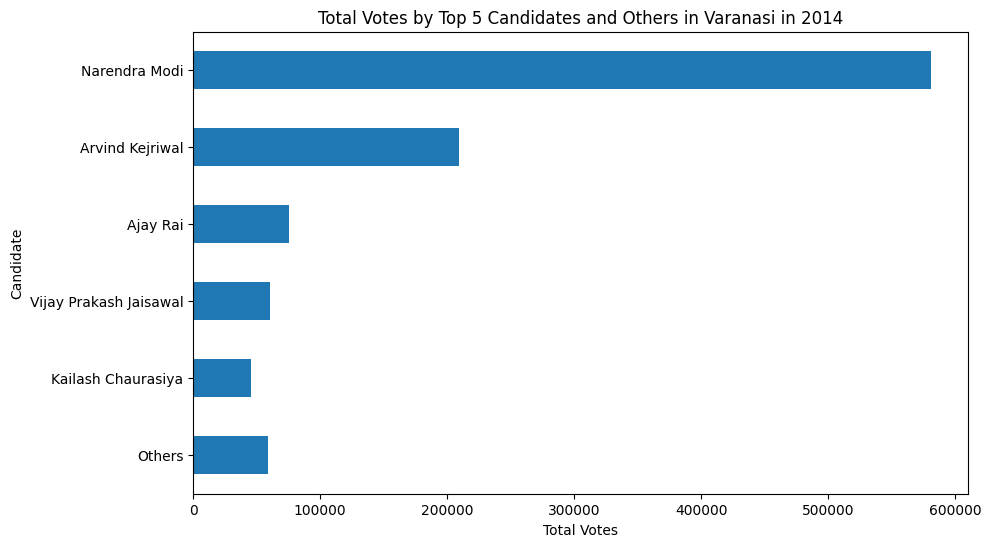

In [10]:
# Function to plot Horizontal Bar Graph of Total Votes by Candidate in a Constituency and Year

def plot_horizontal_bar_votes_by_candidate(data, pc_name, year):
    pc_year_data = data[(data['pc_name'] == pc_name) & (data['year'] == year)]
    if pc_year_data.empty:
        print("No data found for the selected constituency and year.")
        return
    
    # Group data by candidate name and sum the total votes secured by each candidate
    candidate_votes = pc_year_data.groupby('cand_name')['totvotpoll'].sum().sort_values(ascending=False)
    
    # Select top 5 contestants and sum the rest as "Others"
    top_5_candidates = candidate_votes.head(5)
    others_votes = candidate_votes[5:].sum()
    top_5_candidates['Others'] = others_votes
    
    # Reverse the order of the DataFrame
    top_5_candidates = top_5_candidates.iloc[::-1]
    
    # Plot horizontal bar graph
    plt.figure(figsize=(10, 6))
    top_5_candidates.plot(kind='barh')
    plt.xlabel('Total Votes')
    plt.ylabel('Candidate')
    plt.title(f'Total Votes by Top 5 Candidates and Others in {pc_name} in {year}')
    plt.show()

pc_name_choice = input("Enter the constituency name (pc_name): ").strip()
year_choice = int(input("Enter the year: "))
# Plot horizontal bar graph for Total Votes by Candidate
plot_horizontal_bar_votes_by_candidate(df, pc_name_choice, year_choice)

## Margin of Victory

Enter the constituency name (pc_name):  Varanasi


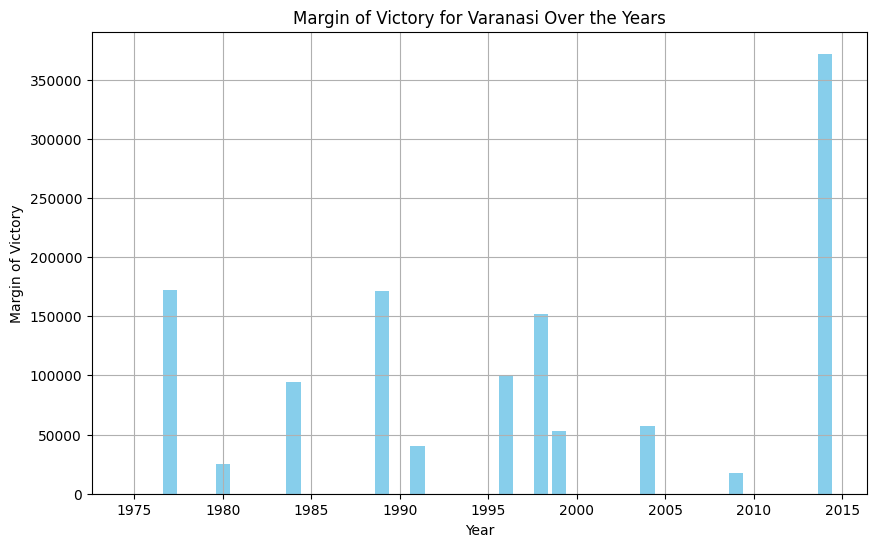

In [14]:
# Function to calculate margin of victory for a specific constituency and year
def calculate_margin_of_victory(data, pc_name, year):
    pc_year_data = data[(data['pc_name'] == pc_name) & (data['year'] == year)]
    if pc_year_data.empty:
        return None
    else:
        # Sort the data by votes in descending order
        pc_year_data = pc_year_data.sort_values(by='totvotpoll', ascending=False)
        # Calculate margin of victory (difference between largest and second-largest vote contenders)
        margin_of_victory = pc_year_data.iloc[0]['totvotpoll'] - pc_year_data.iloc[1]['totvotpoll']
        return margin_of_victory

# Function to plot bar graph of margin of victory for every year
def plot_margin_of_victory_bar(data, pc_name):
    years = range(1975, 2015)
    margins_of_victory = []
    for year in years:
        margin_of_victory = calculate_margin_of_victory(data, pc_name, year)
        if margin_of_victory is not None:
            margins_of_victory.append(margin_of_victory)
        else:
            margins_of_victory.append(0)  # Set margin of victory to 0 if data is not available for a year
    
    # Plot bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(years, margins_of_victory, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Margin of Victory')
    plt.title(f'Margin of Victory for {pc_name} Over the Years')
    plt.grid(True)
    plt.show()


pc_name_choice = input("Enter the constituency name (pc_name): ").strip()
# Plot histogram of margin of victory for every year for the specified constituency or all constituencies
plot_margin_of_victory_bar(df, pc_name_choice)

Enter the year:  2014


/tmp/ipykernel_32/4244661859.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  winners = grouped.apply(lambda x: x.loc[x['totvotpoll'].idxmax()])
/tmp/ipykernel_32/4244661859.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  runner_ups = grouped.apply(lambda x: x.nlargest(2, 'totvotpoll').iloc[-1])


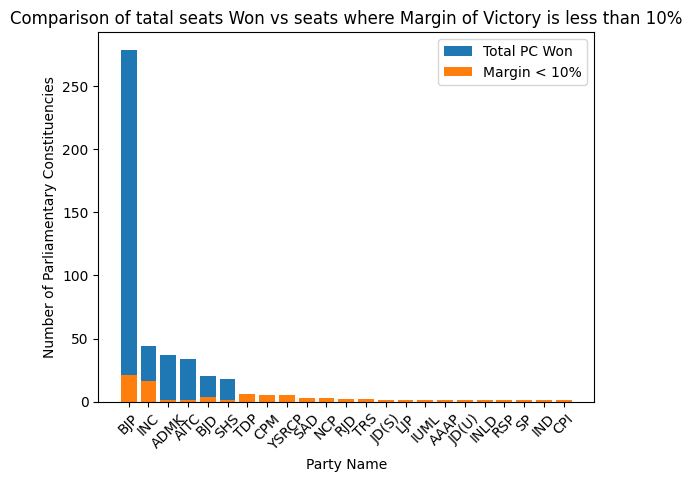

In [15]:
# Step 2: Filter Data for a Specific Year
year = int(input("Enter the year: "))
df_year = df[df['year'] == year]

# Step 3: Group Data by Parliamentary Constituency Name
grouped = df_year.groupby('pc_name')

# Step 4: Calculate Winner and Runner-up
winners = grouped.apply(lambda x: x.loc[x['totvotpoll'].idxmax()])
runner_ups = grouped.apply(lambda x: x.nlargest(2, 'totvotpoll').iloc[-1])

# Step 5: Calculate Margin of Victory
margin = winners['totvotpoll'].values - runner_ups['totvotpoll'].values

# Step 6: Count Constituencies with Margins Less Than 5% and 10%
count_less_5 = sum(margin < 0.05 * winners['totvotpoll'].values)
count_less_10 = sum(margin < 0.1 * winners['totvotpoll'].values)

# Step 7: Plot Visualization
total_pc_won = winners['partyname'].value_counts()[:6]
margin_less_5_pc = winners[margin < 0.05 * winners['totvotpoll'].values]['partyname'].value_counts()
margin_less_10_pc = winners[margin < 0.1 * winners['totvotpoll'].values]['partyname'].value_counts()

plt.bar(total_pc_won.index, total_pc_won.values, label='Total PC Won')
plt.bar(margin_less_10_pc.index, margin_less_10_pc.values, label='Margin < 10%')
plt.xlabel('Party Name')
plt.ylabel('Number of Parliamentary Constituencies')
plt.title('Comparison of tatal seats Won vs seats where Margin of Victory is less than 10%')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## NOTA vote share

select election year (to find the highest nota voted constituencies) 2014


Top 5 constituencies with highest NOTA vote share% in 2014: [[3.587925555959089, 'Dahod'], [4.188215363993791, 'Tura '], [4.344474315477238, 'Nabarangpur '], [4.989840055901127, 'Nilgiris '], [5.0358936659077065, 'Bastar']]


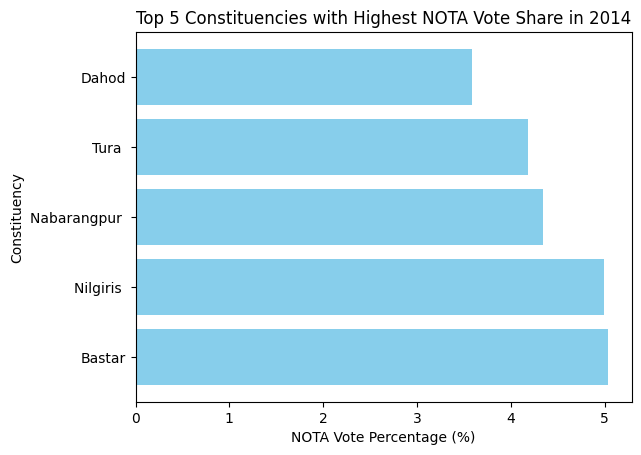

/tmp/ipykernel_32/2890963664.py:58: RuntimeWarning: invalid value encountered in scalar divide
  nota_vote_percentage = (nota_votes / total_votes) * 100


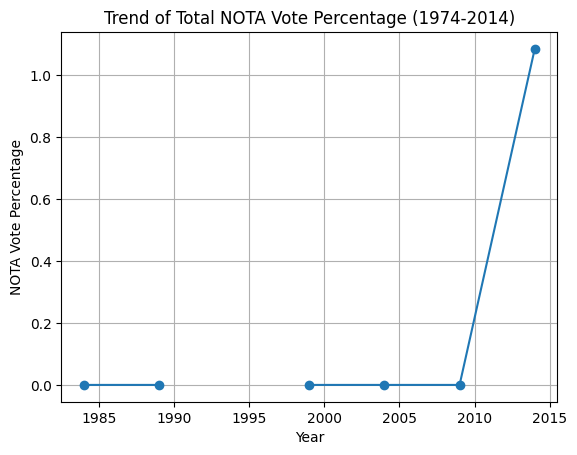

In [17]:
# Function to calculate NOTA vote share percentage for a given constituency in a particular year
def calculate_nota_vote_share(df, constituency, year):
    df_con_year = df[(df['pc_name'] == constituency) & (df['year'] == year)]
    total_votes = df_con_year['totvotpoll'].sum()
    nota_votes = df_con_year[df_con_year['partyname'] == 'NOTA']['totvotpoll'].sum()
    if total_votes == 0:
        return 0
    nota_vote_share_percent = (nota_votes / total_votes) * 100
    return nota_vote_share_percent


# Example: Calculate NOTA vote share percentage for a given constituency and year
#constituency = input("Enter the constituency name (pc_name): ")
#nota_vote_share_percent = calculate_nota_vote_share(df, constituency, year)
#print(f"NOTA vote share percentage for {constituency} in {year}: {nota_vote_share_percent:.2f}%")

# Function to find constituencies with highest NOTA vote share in a particular year
def find_highest_nota_constituencies(df, year, num_constituencies):
    df_year = df[df['year'] == year]
    nota_vote_share_dict = {}
    for constituency in df_year['pc_name'].unique():
        nota_vote_share = calculate_nota_vote_share(df_year, constituency, year)
        nota_vote_share_dict[constituency] = nota_vote_share
    dictlist = []
    for key, value in nota_vote_share_dict.items():
        temp = [value,key]
        dictlist.append(temp)
    sort_l = sorted(dictlist)
    
    return sort_l[-num_constituencies:]

years = [1974,1979,1984,1989,1994,1999,2004,2009,2014]  # Create a list of years from 1974 to 2014

year = int(input("select election year (to find the highest nota voted constituencies)"))
# Example: Find constituencies with highest NOTA vote share in a particular year
num_constituencies = 5
highest_nota_constituencies = find_highest_nota_constituencies(df, year, num_constituencies)
print(f"Top {num_constituencies} constituencies with highest NOTA vote share% in {year}: {highest_nota_constituencies}")
# Extracting data for plotting
constituencies = [constituency[1] for constituency in highest_nota_constituencies]
nota_vote_percentages = [constituency[0] for constituency in highest_nota_constituencies]

# Plotting
plt.barh(constituencies, nota_vote_percentages, color='skyblue')
plt.xlabel('NOTA Vote Percentage (%)')
plt.ylabel('Constituency')
plt.title(f'Top {len(highest_nota_constituencies)} Constituencies with Highest NOTA Vote Share in {year}')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest percentage at the top
plt.show()

nota_vote_percentages = []  

for year in years:
    # Filter the dataframe for the current year and calculate NOTA vote percentage
    df_year = df[df['year'] == year]
    nota_votes = df_year[df_year['partyname'] == 'NOTA']['totvotpoll'].sum()
    total_votes = df_year['totvotpoll'].sum()
    nota_vote_percentage = (nota_votes / total_votes) * 100
    
    nota_vote_percentages.append(nota_vote_percentage)  # Append the calculated percentage to the list

# Plot the trend
plt.plot(years, nota_vote_percentages, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('NOTA Vote Percentage')
plt.title('Trend of Total NOTA Vote Percentage (1974-2014)')
plt.grid(True)
plt.show()
